# Data classification with a Neural Network

This is my third Neural network implement from scratch.

In this Notebook, we'll come back on the basis, doing a Logistic Regression with a Neural Network.
The Neural Network will look like this:

<img src="images/NN.png" style="height:400px;">

## What to do?

Run the first part to import the packages.

Use the second part to generate the data. Re-run the code if the plot doesn't suit you.

Run then all the other cells and go to the end of this notebook to see the results with different models of neural network.

## Organization of this Notebook 
    1. Packages
    2. Generation of the dataset
    3. Sigmoid, tanh and Initialization
    4. Forward and backward propagation: compute the gradient
    5. Train & Test methods
    6. Model construction
    7. Visualize the model decision

## 1 - Packages ##

- [numpy](https://www.numpy.org/): the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org): a a library for plotting graphs in Python.
- [sklearn](http://scikit-learn.org/stable/): a simple and efficient tools for data mining and data analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#import sklearn
#import sklearn.datasets
#import sklearn.linear_model

%matplotlib inline

## 2 - Generation of the dataset ##

In [2]:
def construct_planar_dataset(sizeData = 400, ellipsisFitting = 4):
    N = int(sizeData/2) # number of points per class
    X = np.zeros((sizeData, 2)) # data matrix where each row is a single example
    Y = np.zeros((sizeData, 1), dtype='uint8') # labels vector (0 for red, 1 for blue)

    for j in range(2):
        ix = range(N * j, N * (j+1))
        
        theta = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N) * 0.2
        radius = ellipsisFitting * np.sin(4*theta) + np.random.randn(N) * 0.2
        
        X[ix] = np.c_[radius * np.sin(theta), radius * np.cos(theta)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

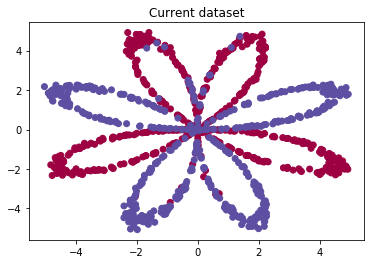

In [3]:
X, Y = construct_planar_dataset(1000, 5)
plt.title('Current dataset')
plt.scatter(X[0, :], X[1, :], c=Y.ravel().tolist(), cmap=plt.cm.Spectral)

## 3 - Sigmoid and initialization ##

 The $tanh(z)$ function, already implemented in numpy, will be use as $tanh( W1^T X + b1 )$ to compute the hidden units activation values.
 
 The sigmoid defined as $sigmoid(z) = \frac{1}{1 + e^{-(z)}}$ will be use as $sigmoid( W2^T A1 + b2)$ to make predictions.
 
 We initialize $(W1, W2)$ randomly and $(b1, b2)$ as a vector of 0

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize(X, Y, nbHiddenUnits):
    W1 = np.random.randn(nbHiddenUnits, X.shape[0]) * 0.01
    b1 = np.zeros((nbHiddenUnits, 1))
    W2 = np.random.randn(Y.shape[0], nbHiddenUnits) * 0.01
    b2 = np.zeros((Y.shape[0], 1))
    return W1, b1, W2, b2

## 4 - Forward and backward propagation: compute the gradient ##

Forward propagation:
$$Z^{[1](i)} =  W^{[1]} \; X^{(i)} + b^{[1]}\tag{1}$$

$$A^{[1](i)} = \tanh(Z^{[1](i)})\tag{2}$$

$$Z^{[2](i)} = W^{[2]} \; A^{[1](i)} + b^{[2]}\tag{3}$$

$$\hat{Y}^{(i)} = \sigma(Z^{[2](i)})\tag{4}$$

Backward propagation using the cost function $\mathcal{L}(\hat{Y}^{(i)}, Y^{(i)})$:

$$\mathcal{L}(\hat{Y}^{(i)}, Y^{(i)}) =  - Y^{(i)}  \log(\hat{Y}^{(i)}) - (1-Y^{(i)} )  \log(1-\hat{Y}^{(i)})\tag{5}$$

$$\frac{\partial \mathcal{L}}{\partial \hat{Y}} =  - \frac{Y}{\hat{Y}} + \frac{1-Y}{1 - \hat{Y}}\tag{6}$$

$$\frac{\partial \mathcal{L}}{\partial Z^{[2]}} = \frac{\partial \mathcal{L}}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial Z^{[2]}} = \frac{\partial \mathcal{L}}{\partial \hat{Y}} \;\; \hat{Y}(1 - \hat{Y}) = \hat{Y} - Y\tag{7}$$

$$\frac{\partial  \mathcal{L}}{\partial W^{[2]}} = \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} = (\hat{Y} - Y) \; A^{[1]}\tag{8}$$

$$\frac{\partial  \mathcal{L}}{\partial b^{[2]}} = \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial b^{[2]}} = (\hat{Y} - Y)\tag{9}$$

$$\frac{\partial  \mathcal{L}}{\partial A^{[1]}} = \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial A^{[1]}} = (\hat{Y} - Y) \; W^{[2]}\tag{10}$$

$$\frac{\partial  \mathcal{L}}{\partial Z^{[1]}} = \frac{\partial \mathcal{L}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} = (\hat{Y} - Y) \; W^{[2]} \; (1 - A^{[1]^2})\tag{11}$$

$$\frac{\partial  \mathcal{L}}{\partial W^{[1]}} = \frac{\partial \mathcal{L}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} = (\hat{Y} - Y) \; W^{[2]} \; (1 - A^{[1]^2})\; X\tag{12}$$

$$\frac{\partial  \mathcal{L}}{\partial b^{[1]}} = \frac{\partial \mathcal{L}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial b^{[1]}} = (\hat{Y} - Y) \; W^{[2]} \; (1 - A^{[1]^2})\tag{13}$$

Implementation notation:

$$dZ2 = \hat{Y} - Y\tag{7}$$

$$dW2 = dZ2 \; A1\tag{8}$$

$$db2 = dZ2\tag{9}$$

$$dZ1 = W2 \; dZ2 \; tanh'(Z1)\tag{11}$$

$$dW1 = dZ1 \; X\tag{12}$$

$$db1 = dZ1\tag{13}$$

In [5]:
def computeGradient(W1, b1, W2, b2, X, Y):
    # Forward propagation
    A1 = np.tanh( np.dot(W1, X) + b1 )
    Yhat = sigmoid( np.dot(W2, A1) + b2 )
    
    # Backward propagation
    dZ2 = Yhat - Y
    dW2 = np.dot(dZ2, A1.T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    return dW1, db1, dW2, db2

## 5 - Predict & Train functions ##

The goal is to learn $W^{[2]}$, $W^{[1]}$, $b^{[2]}$ and $b^{[2]}$ by minimizing the cost function $\mathcal{L}$:

$$W^{[2]} = W^{[2]} - \alpha \frac{\partial \mathcal{L}}{\partial W^{[2]}}\tag{14}$$

$$b^{[2]} = b^{[2]} - \alpha \frac{\partial \mathcal{L}}{\partial b^{[2]}}\tag{15}$$

$$W^{[1]} = W^{[1]} - \alpha  \frac{\partial \mathcal{L}}{\partial W^{[1]}}\tag{16}$$

$$b^{[1]} = b^{[1]} - \alpha \frac{\partial \mathcal{L}}{\partial b^{[1]}}\tag{17}$$
where $\alpha$ is the learning rate.

As for the prediction:
$$Y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } \hat{Y}^{(i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{18}$$

In [6]:
def predict(W1, b1, W2, b2, X, decisionTreshold = 0.5):
    # Compute the activation values
    A1 = np.tanh( np.dot(W1, X) + b1 )
    Yhat = sigmoid( np.dot(W2, A1) + b2 )
    
    # Prediction
    predict = (Yhat > decisionTreshold)
    
    return predict

In [7]:
def train(W1, b1, W2, b2, X, Y, iteration, learning_rate):
    
    for i in range(iteration):
        
        # Compute forward and backward propagation
        dW1, db1, dW2, db2 = computeGradient(W1, b1, W2, b2, X, Y)
        
        # Update de weights and the bias
        W1 = W1 - dW1 * learning_rate
        b1 = b1 - db1 * learning_rate
        W2 = W2 - dW2 * learning_rate
        b2 = b2 - db2 * learning_rate

    return W1, b1, W2, b2

## 6 - Model construction ##

In [8]:
def model(X_train, Y_train, nbHiddenUnits = 4, iteration = 10000, learning_rate = 1.2):
    # Initialize the weights and the bias
    W1, b1, W2, b2 = initialize(X_train, Y_train, nbHiddenUnits)

    # Train the model
    W1, b1, W2, b2 = train(W1, b1, W2, b2, X_train, Y_train, iteration, learning_rate)
    
    return W1, b1, W2, b2

## 7. Visualize the model decision ##

In [9]:
def saveParameters(W1, b1, W2, b2):
    path = "parameters/"
    if not os.path.exists(path):
        os.mkdir(path)
    
    path = path + str(W1.shape[0]) + "/"
    if not os.path.exists(path):
        os.mkdir(path)
    
    np.save(path + 'W1', W1)
    np.save(path + 'b1', b1)
    np.save(path + 'W2', W2)
    np.save(path + 'b2', b2)

In [10]:
def visualize_decision(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

Accuracy for 1 hidden units: 43.5 %
Accuracy for 2 hidden units: 43.1 %
Accuracy for 3 hidden units: 68.8 %
Accuracy for 4 hidden units: 69.5 %
Accuracy for 5 hidden units: 68.30000000000001 %
Accuracy for 10 hidden units: 69.3 %
Accuracy for 15 hidden units: 69.39999999999999 %
Accuracy for 20 hidden units: 69.0 %
Accuracy for 30 hidden units: 69.5 %
Accuracy for 50 hidden units: 69.6 %
Accuracy for 100 hidden units: 69.3 %


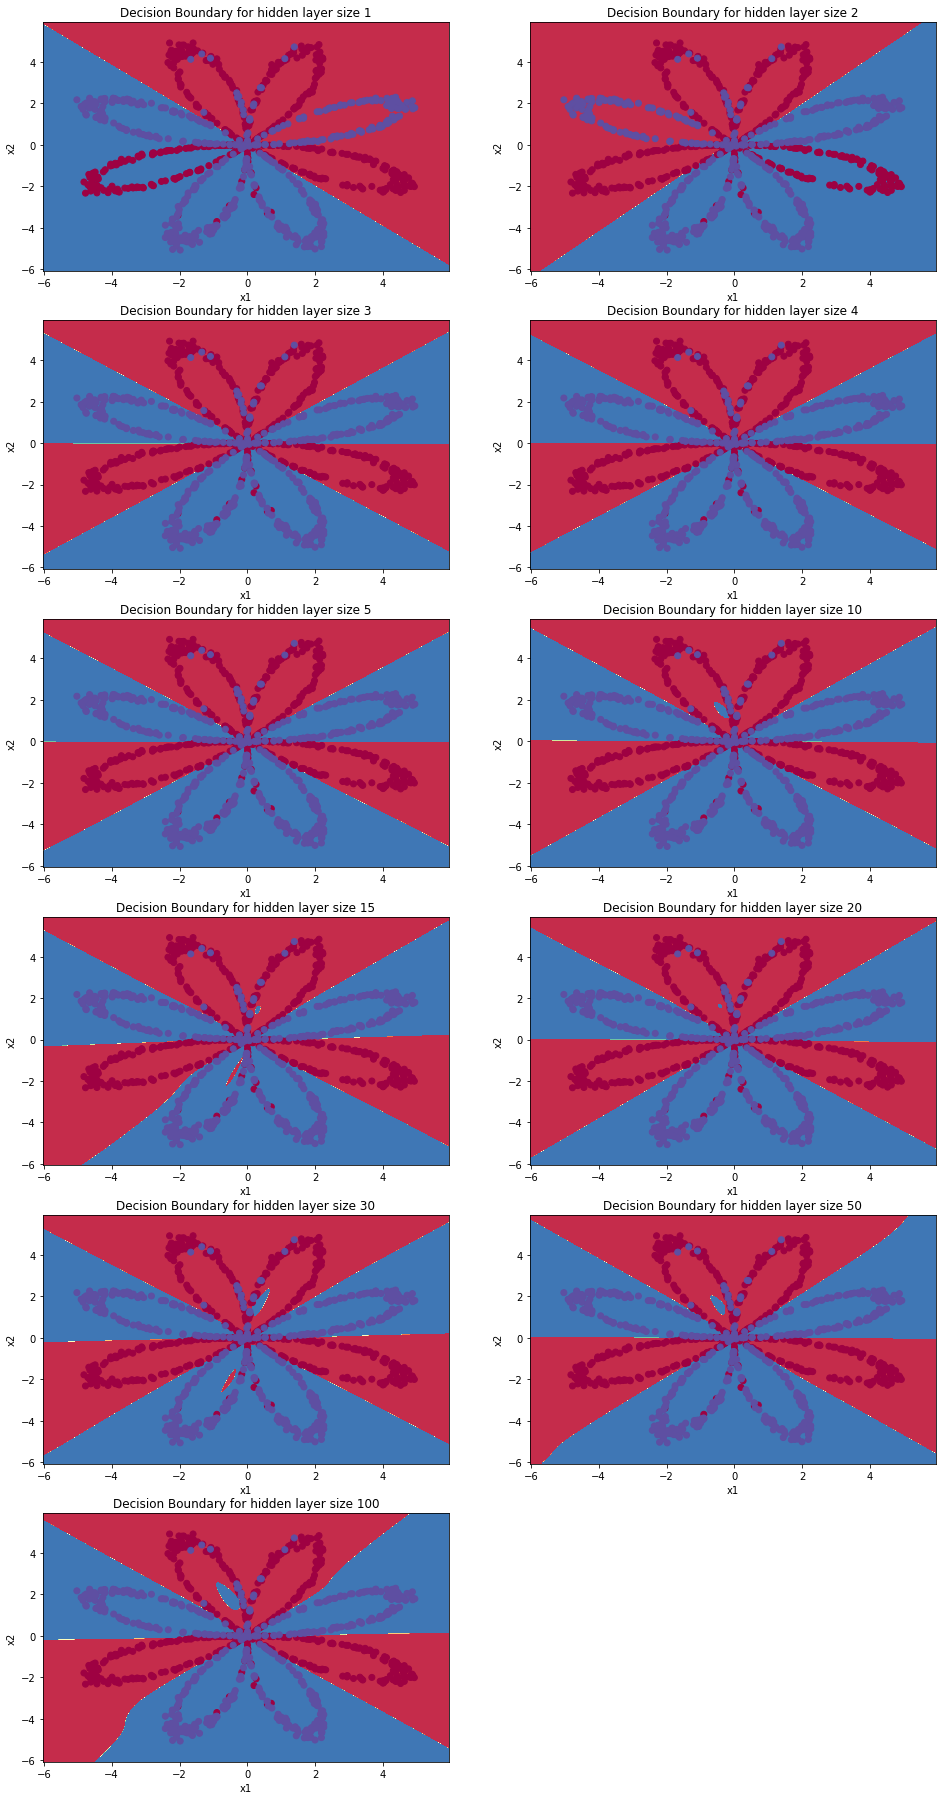

In [11]:
hidden = [1, 2, 3, 4, 5, 10, 15, 20, 30, 50, 100]

plt.figure(figsize=(16, 32))

for i, nb_h in enumerate(hidden):
    plt.subplot(6, 2, i+1)
    plt.title("Decision Boundary for hidden layer size " + str(nb_h))
    
    # Build a model with a n_h-dimensional hidden layer
    W1, b1, W2, b2 = model(X, Y, nb_h, 10000, 1.2)
    
    # Save the parameters
    saveParameters(W1, b1, W2, b2)
    
    # Plot the decision boundary
    visualize_decision(lambda x : predict(W1, b1, W2, b2, x.T), X, Y.ravel().tolist())
    
    # Accuracy
    predictions = predict(W1, b1, W2, b2, X)
    accuracy = float( (np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T) ) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(nb_h, accuracy))